In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import plotly.graph_objects  as go
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\isaac\Documentos\Eco\6to\Econometría II\delanteros.xls")

In [3]:
df.head()

,nombre,edad,posicion,valor,valor_06/18,jugo_UCL,pais,aumento_valor,comunitario,goles
0,kylian-mbappe,21,Delantero - Delantero centro,180.0,120,1,francia,1,1,18
1,raheem-sterling,25,Delantero - Extremo izquierdo,128.0,90,1,inglaterra,1,1,11
2,neymar,28,Delantero - Extremo izquierdo,128.0,180,1,brasil,0,0,13
3,sadio-mane,28,Delantero - Extremo izquierdo,120.0,70,1,senegal,1,0,14
4,mohamed-salah,27,Delantero - Extremo derecho,120.0,150,1,egipto,0,0,16


In [4]:
df.describe()

,edad,valor,valor_06/18,jugo_UCL,aumento_valor,comunitario,goles
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,25.211111,51.522222,49.455556,0.700000,0.566667,0.566667,8.233333
std,3.770061,29.341453,40.420309,0.460825,0.498312,0.498312,5.943649
min,17.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.250000,32.000000,20.000000,0.000000,0.000000,0.000000,4.000000
50%,25.000000,40.000000,40.000000,1.000000,1.000000,1.000000,7.000000
75%,28.000000,60.000000,73.750000,1.000000,1.000000,1.000000,11.000000
max,35.000000,180.000000,180.000000,1.000000,1.000000,1.000000,27.000000


In [5]:
df.groupby("aumento_valor").count()

,nombre,edad,posicion,valor,valor_06/18,jugo_UCL,pais,comunitario,goles
aumento_valor,,,,,,,,,
0,39,39,39,39,39,39,39,39,39
1,51,51,51,51,51,51,51,51,51


In [6]:
df.groupby("aumento_valor").mean()

,edad,valor,valor_06/18,jugo_UCL,comunitario,goles
aumento_valor,,,,,,
0,27.435897,56.923077,79.051282,0.794872,0.615385,9.230769
1,23.509804,47.392157,26.823529,0.627451,0.529412,7.470588


In [7]:
df.corr()

,edad,valor,valor_06/18,jugo_UCL,aumento_valor,comunitario,goles
edad,1.000000,0.042313,0.402976,0.075668,-0.518936,-0.094298,0.385882
valor,0.042313,1.000000,0.765345,0.224864,-0.161866,-0.005482,0.379935
valor_06/18,0.402976,0.765345,1.000000,0.310838,-0.643877,-0.033043,0.346765
jugo_UCL,0.075668,0.224864,0.310838,1.000000,-0.181040,-0.034251,-0.006974
aumento_valor,-0.518936,-0.161866,-0.643877,-0.181040,1.000000,-0.085973,-0.147572
comunitario,-0.094298,-0.005482,-0.033043,-0.034251,-0.085973,1.000000,0.011760
goles,0.385882,0.379935,0.346765,-0.006974,-0.147572,0.011760,1.000000


In [8]:
df[["aumento_valor","edad"]].corr()

,aumento_valor,edad
aumento_valor,1.000000,-0.518936
edad,-0.518936,1.000000


In [9]:
df[["aumento_valor","goles"]].corr()

,aumento_valor,goles
aumento_valor,1.000000,-0.147572
goles,-0.147572,1.000000


In [10]:
df[["aumento_valor","jugo_UCL"]].corr()

,aumento_valor,jugo_UCL
aumento_valor,1.00000,-0.18104
jugo_UCL,-0.18104,1.00000


In [11]:
df[["aumento_valor","comunitario"]].corr()

,aumento_valor,comunitario
aumento_valor,1.000000,-0.085973
comunitario,-0.085973,1.000000


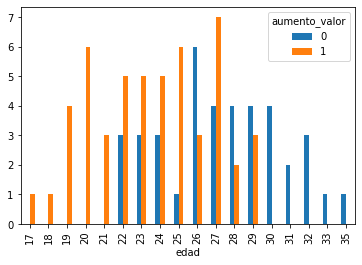

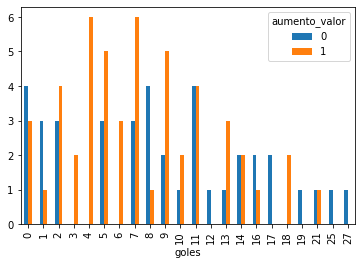

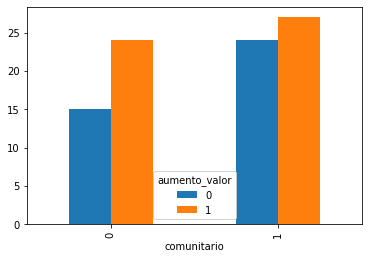

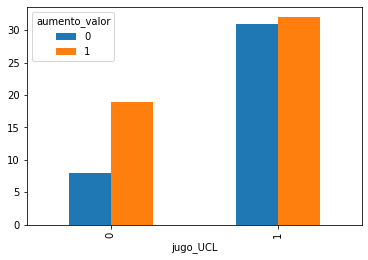

In [12]:
table = pd.crosstab(df.edad,df.aumento_valor).plot(kind="bar")
table2= pd.crosstab(df.goles,df.aumento_valor).plot(kind="bar")
table3= pd.crosstab(df.comunitario,df.aumento_valor).plot(kind="bar")
table4= pd.crosstab(df.jugo_UCL,df.aumento_valor).plot(kind="bar")

In [13]:
mas_27=df.loc[df["edad"]>=27]
menos_27=df.loc[df["edad"]<27]

In [14]:
promedio_goles = [np.mean(df.goles)]*len(df)

In [15]:
# y = valor
# x = goles
# z = edad


In [16]:
import statsmodels.api as sm

In [17]:
df.columns.values.tolist()

['nombre',
 'edad',
 'posicion',
 'valor',
 'valor_06/18',
 'jugo_UCL',
 'pais',
 'aumento_valor',
 'comunitario',
 'goles']

In [18]:
X= df[['edad','jugo_UCL','comunitario','goles']]
Y= df[['aumento_valor']]
X= sm.add_constant(X)
model = sm.Logit(Y, X).fit()
print(model.summary())

C:\Users\isaac\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Optimization terminated successfully.
         Current function value: 0.502610
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          aumento_valor   No. Observations:                   90
Model:                          Logit   Df Residuals:                       85
Method:                           MLE   Df Model:                            4
Date:                Sat, 23 May 2020   Pseudo R-squ.:                  0.2654
Time:                        19:08:16   Log-Likelihood:                -45.235
converged:                       True   LL-Null:                       -61.581
Covariance Type:            nonrobust   LLR p-value:                 1.381e-06
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.4854      2.524      4.551      0.000       6.539      16.432
edad           -0.4052    

In [19]:
Y_hat_ps = model.predict(X)

In [20]:
print("PEA",model.get_margeff(at="mean").summary())
print("un aumento en 1 unidad en el promedio de edad, genera un decrecimiento de la probabilidad de que aumente el valor en.0978")

PEA         Logit Marginal Effects       
Dep. Variable:          aumento_valor
Method:                          dydx
At:                              mean
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
edad           -0.0978      0.023     -4.308      0.000      -0.142      -0.053
jugo_UCL       -0.2170      0.139     -1.562      0.118      -0.489       0.055
comunitario    -0.2014      0.130     -1.547      0.122      -0.457       0.054
goles           0.0061      0.011      0.543      0.587      -0.016       0.028
un aumento en 1 unidad en el promedio de edad, genera un decrecimiento de la probabilidad de que aumente el valor en.0978


In [21]:
print("APE",model.get_margeff().summary())
print("un aumento de 1 unidad en edad, resulta en el decrecimiento del promedio simple en .0674 de la probabilidad de que aumente el valor")

APE         Logit Marginal Effects       
Dep. Variable:          aumento_valor
Method:                          dydx
At:                           overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
edad           -0.0674      0.009     -7.607      0.000      -0.085      -0.050
jugo_UCL       -0.1496      0.091     -1.640      0.101      -0.328       0.029
comunitario    -0.1389      0.086     -1.619      0.105      -0.307       0.029
goles           0.0042      0.008      0.545      0.586      -0.011       0.019
un aumento de 1 unidad en edad, resulta en el decrecimiento del promedio simple en .0674 de la probabilidad de que aumente el valor


$ y=11.48-0.4052*edad-0.8988*jugo UCL-0.8344*comunitario+.0253*goles $

In [68]:
suma_correct = 0
suma_y_1 = 0
threshold = .5
for i in range(90):
    true_y = df["aumento_valor"][i]
    y_hat_p = Y_hat_ps[i]
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if true_y == y_hat:
        suma_correct += 1
    suma_y_1 += y_hat
print('Fitness:', suma_correct / 90)
print(df["aumento_valor"].sum())
print(suma_y_1)

Fitness: 0.7111111111111111
51
51


In [23]:
suma_correct = 0
suma_y_1 = 0
threshold = df["aumento_valor"].sum()/90
for i in range(90):
    y_true=df["aumento_valor"][i]
    y_hat_p = Y_hat_ps[i]
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if y_true == y_hat:
        suma_correct += 1
    suma_y_1 += y_hat
print('Fitness:', suma_correct / 90)
print(df["aumento_valor"].sum())
print(suma_y_1,suma_correct)

Fitness: 0.7333333333333333
51
47 66


In [24]:
success_rates = []
for threshold in np.linspace(0, 1, 1000):
    suma_correct = 0
    suma_y_1 = 0
    for i in range(90):
        true_y = df["aumento_valor"][i]
        y_hat_p = Y_hat_ps[i]
        if y_hat_p >= threshold:
            y_hat = 1
        else:
            y_hat = 0
        if true_y == y_hat:
            suma_correct += 1
        suma_y_1 += y_hat
    success_rate = suma_y_1 / 90
    success_rates.append(success_rate)

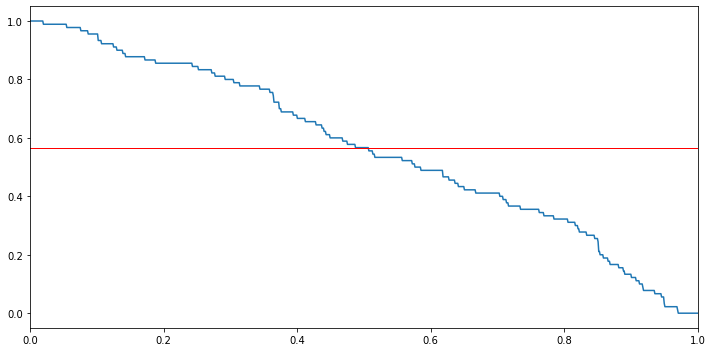


Done!


In [25]:
fig = plt.figure(figsize=(10, 5))
axis = plt.gca()
plt.plot(list(np.linspace(0, 1, 1000)), success_rates)
plt.axhline(df["aumento_valor"].sum() / 90, color='red', linewidth=1)
plt.xlim(0, 1)
fig.tight_layout()
plt.show()
plt.close(plt.gcf())
print('\nDone!')

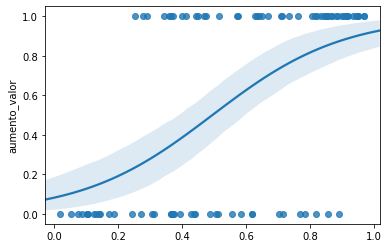

In [26]:
sns.regplot(x=Y_hat_ps, y=df["aumento_valor"], data=df, logistic=True)

In [27]:
X_sig= df[['edad']]
Y_sig= df[['aumento_valor']]
X_sig= sm.add_constant(X_sig)
model2 = sm.Logit(Y_sig, X_sig).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.530476
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          aumento_valor   No. Observations:                   90
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 May 2020   Pseudo R-squ.:                  0.2247
Time:                        19:08:23   Log-Likelihood:                -47.743
converged:                       True   LL-Null:                       -61.581
Covariance Type:            nonrobust   LLR p-value:                 1.434e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7229      2.231      4.359      0.000       5.351      14.095
edad          -0.3711      0.

$ y=9.7229-0.3711*edad $

In [28]:
print("PEA",model2.get_margeff(at="mean").summary())

PEA         Logit Marginal Effects       
Dep. Variable:          aumento_valor
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
edad          -0.0897      0.021     -4.348      0.000      -0.130      -0.049


In [29]:
print("APE",model2.get_margeff().summary())

APE         Logit Marginal Effects       
Dep. Variable:          aumento_valor
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
edad          -0.0659      0.008     -7.913      0.000      -0.082      -0.050


In [69]:
Y_hat_ps_sig = model2.predict(X_sig)

In [94]:
suma_correct = 0
suma_y_1 = 0
threshold = .5111111
for i in range(90):
    true_y = df["aumento_valor"][i]
    y_hat_p = Y_hat_ps_sig[i]
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if true_y == y_hat:
        suma_correct += 1
    suma_y_1 += y_hat
print('Fitness:', suma_correct / 90)
print('Aumentos en el modelo:',df["aumento_valor"].sum())
print('Prediccion:',suma_y_1)

Fitness: 0.6888888888888889
Aumentos en el modelo: 51
Prediccion: 55


In [87]:
suma_correct = 0
suma_y_1 = 0
threshold = df["aumento_valor"].sum()/90
for i in range(90):
    y_true=df["aumento_valor"][i]
    y_hat_p = Y_hat_ps_sig[i]
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if y_true == y_hat:
        suma_correct += 1
    suma_y_1 += y_hat
print('Fitness:', suma_correct / 90)
print('Aumentos en el modelo:',df["aumento_valor"].sum())
print('Prediccion:',suma_y_1)

Fitness: 0.7222222222222222
Aumentos en el modelo: 51
Prediccion: 46


In [95]:
success_rates = []
for threshold in np.linspace(0, 1, 1000):
    suma_correct = 0
    suma_y_1 = 0
    for i in range(90):
        true_y = df["aumento_valor"][i]
        y_hat_p = Y_hat_ps_sig[i]
        if y_hat_p >= threshold:
            y_hat = 1
        else:
            y_hat = 0
        if true_y == y_hat:
            suma_correct += 1
        suma_y_1 += y_hat
    success_rate = suma_y_1 / 90
    success_rates.append(success_rate)

In [96]:
success_rates

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 0.9888888888888889,
 

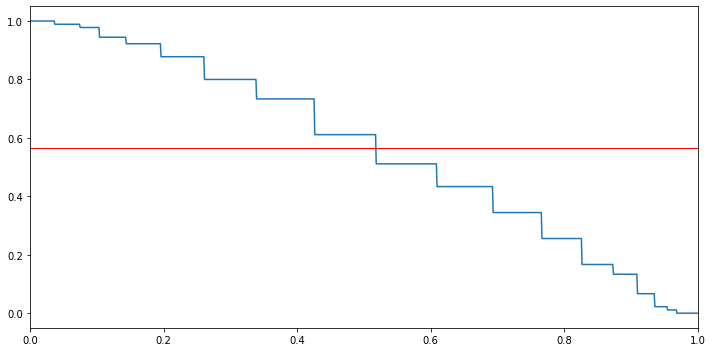


Done!


In [92]:
fig = plt.figure(figsize=(10, 5))
axis = plt.gca()
plt.plot(list(np.linspace(0, 1, 1000)), success_rates)
plt.axhline(df["aumento_valor"].sum() / 90, color='red', linewidth=1)
plt.xlim(0, 1)
fig.tight_layout()
plt.show()
plt.close(plt.gcf())
print('\nDone!')

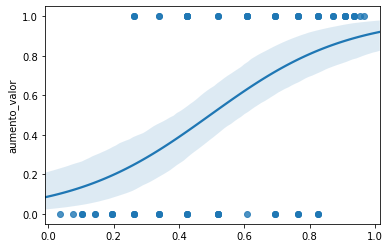

In [35]:
sns.regplot(x=Y_hat_ps_sig, y=df["aumento_valor"], data=df, logistic=True)

In [47]:
mas_8 = df[df["goles"]>=8]
ass=mas_8[mas_8["edad"]>=27]
len(ass)

22

In [50]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=mas_27["goles"],
    y=mas_27["edad"],
    mode="markers",
    marker=dict(
    size=12,
    color = 'red',
    colorscale='thermal',
    opacity=.8),
    name="mayores de 27",
    text=mas_27["nombre"],
    textposition="top center"
))
fig.add_trace((go.Scatter(
    x=menos_27["goles"],
    y=menos_27["edad"],
    mode="markers",
    marker=dict(
    size=12,
    color = 'blue',
    colorscale='thermal',
    opacity=.8),
    name="menores de 27",
    text=menos_27["nombre"],
    textposition="top center")
))
fig.add_trace((go.Scatter(
    x=promedio_goles,
    y=df["edad"],
    mode="lines",
    line=dict(
    color = 'black',
    dash = "solid",
    width = 5
    ),
    name="media",
    text=["media"],
    textposition="top center")
))
fig.update_traces(textposition='top right')

fig.update_layout(
    height=500,
    title_text='Goles vs Edad',
    xaxis_title="Goles",
    yaxis_title="Edad"
)
fig.show()

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
                    x=mas_27["goles"],
                    y=mas_27["edad"],
                    z=mas_27["valor"],
                    mode="markers",
                    marker=dict(
                    size=12,
                    color = 'blue',
                    colorscale='thermal',
                    opacity=.8),
                    name = "mayores de 27",
                    text= mas_27["nombre"]))
fig.add_trace(go.Scatter3d(
                    x=menos_27["goles"],
                    y=menos_27["edad"],
                    z=menos_27["valor"],
                    mode="markers",
                    marker=dict(
                    size=12,
                    color = 'orange',
                    colorscale='thermal',
                    opacity=.8),
                    name = "menores de 27",
                    text= menos_27["nombre"]))
fig.update_layout(scene = dict(
                    xaxis_title='GOLES',
                    yaxis_title='EDAD',
                    zaxis_title='VALOR'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

In [62]:
lo = df.groupby("edad").mean()
media_valor = lo["valor"]

In [63]:
edad_unica = df.edad.unique()

In [64]:
edad_unica

array([21, 25, 28, 27, 26, 20, 32, 29, 24, 19, 22, 30, 31, 23, 17, 18, 33,
       35], dtype=int64)

In [65]:
print (edad_unica.sort())

None


In [66]:
edad_unica

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       35], dtype=int64)

In [67]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=edad_unica,
    y=media_valor,
    mode="lines+markers",
    marker=dict(
    size=12,
    color = 'red',
    colorscale='thermal',
    opacity=.8),
    line = dict(
    color= "palevioletred",
    dash = "dot")
))
fig.update_traces(textposition='top right')

fig.update_layout(
    height=500,
    title_text='Valor Promedio por Edad',
    xaxis_title="Edad",
    yaxis_title="Valor")

fig

In [56]:
dasda = df.groupby("goles").mean()
media_valor_gol = dasda["valor"]

In [57]:
goles_unica = df.goles.unique()

In [58]:
print (goles_unica.sort())

None


In [59]:
goles_unica

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 21, 25, 27], dtype=int64)

In [60]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=goles_unica,
    y=media_valor_gol,
    mode="lines+markers",
    marker=dict(
    size=12,
    color = 'blue',
    colorscale='thermal',
    opacity=.8),
    line = dict(
    color= "orange",
    dash = "dot")
))
fig.update_traces(textposition='top center')

fig.update_layout(
    height=500,
    title_text='Valor Promedio por Gol',
    xaxis_title="Goles",
    yaxis_title="Valor")

fig